# Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **provide evidence**?

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it's being processed with the city number and city name.
* OPTIONAL: Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib ,Seaborn or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.

## Hints and Considerations

* The city data is generated based on random coordinates; as such, your outputs will not be an exact match to the provided starter notebook.

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* A starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). 

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!
#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Don't modify this cell.
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# Don't modify this cell
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

A lot of starter code has been generated for you. Use the cell below to play with the data to ensure you know what's happening. 

### Perform API Calls
* Perform a weather check on each city in `cities` using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# base url for getting api data
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# example request
req = requests.get(base_url + f'&q={cities[0]}').json()

# Your code here. A loop maybe? 
#NOTE: API calls can be slow. They can also be limited. Once you have a list try not to rerun all API calls very often. 

current_weather = []

count =0

for city in cities[:10]:
    current_weather.append(requests.get(base_url + f'&q={city}').json())
    time.sleep(1)

    with open('log.txt','a') as f:
        f.write(f'Starting {count} with city: {city}.\n')
    count +=1

In [4]:
# empty dict to hold our data
info_dict = {"city_name":[],
             "lat":[],
             "lon":[],
             "temp":[],
             "cloudiness":[],
             "wind_speed":[],
             "humidity":[]}

for data in current_weather:
    # not all calls come back with data!
    if data['cod'] == 200:
        info_dict["city_name"].append(data['name'])
        info_dict["lat"].append(data['coord']['lat'],)
        info_dict["lon"].append(data['coord']['lon'])
        info_dict["temp"].append(data['main']['temp'])
        info_dict["cloudiness"].append(data['clouds']['all'])
        info_dict["wind_speed"].append(data['wind']['speed'])
        info_dict["humidity"].append(data['main']['humidity'])


In [5]:
len(info_dict['humidity'])

543

### Convert Raw Data to DataFrame
* OPTIONAL: Export the city data into a .csv.
* Display the DataFrame

In [6]:
df = pd.DataFrame.from_dict(info_dict)
df

,city_name,lat,lon,temp,cloudiness,wind_speed,humidity
0,Bad Freienwalde,52.79,14.03,63.27,72,4.00,69
1,Mataura,-46.19,168.86,57.99,67,7.00,65
2,Boa Vista,2.82,-60.67,91.40,40,5.82,43
3,Dikson,73.51,80.55,39.42,33,17.94,89
4,Nikolskoye,59.70,30.79,58.69,35,4.47,82
...,...,...,...,...,...,...,...
538,Qobustan,40.08,49.41,60.80,0,3.58,82
539,Ixtapa,20.70,-105.20,87.80,75,10.29,75
540,Bilibino,68.05,166.44,38.44,99,4.18,85
541,Prince Rupert,54.32,-130.32,55.40,90,6.93,82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Use matplotlib
* OPTIONAL: Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

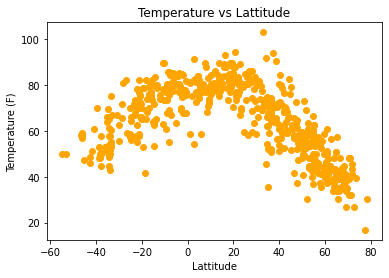

In [7]:
# create a figure and axis
fig, ax = plt.subplots()

# crate a scatter plot
ax.scatter(df['lat'],df['temp'], marker='o',color='orange')
#set x label
ax.set_xlabel("Lattitude")
# set y label
ax.set_ylabel("Temperature (F)")
# give our plot a title
ax.set_title("Temperature vs Lattitude")
# show our plot
plt.show()


#### Latitude vs. Humidity Plot

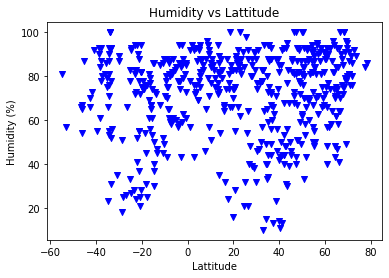

In [8]:
# create a figure and axis
fig, ax = plt.subplots()

# crate a scatter plot
ax.scatter(df['lat'],df['humidity'], marker='v',color='blue')
#set x label
ax.set_xlabel("Lattitude")
# set y label
ax.set_ylabel("Humidity (%)")
# give our plot a title
ax.set_title("Humidity vs Lattitude")
# show our plot
plt.show()


#### Latitude vs. Cloudiness Plot

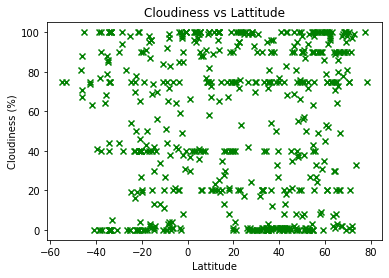

In [9]:
# create a figure and axis
fig, ax = plt.subplots()

# crate a scatter plot
ax.scatter(df['lat'],df['cloudiness'], marker='x',color='g')
#set x label
ax.set_xlabel("Lattitude")
# set y label
ax.set_ylabel("Cloudiness (%)")
# give our plot a title
ax.set_title("Cloudiness vs Lattitude")
# show our plot
plt.show()

#### Latitude vs. Wind Speed Plot

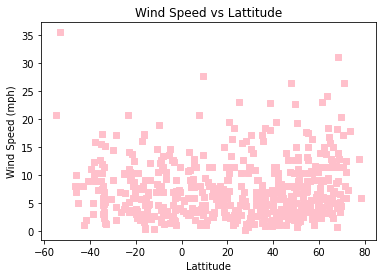

In [10]:
# create a figure and axis
fig, ax = plt.subplots()

# crate a scatter plot
ax.scatter(df['lat'],df['wind_speed'], marker='s',color='pink')
#set x label
ax.set_xlabel("Lattitude")
# set y label
ax.set_ylabel("Wind Speed (mph)")
# give our plot a title
ax.set_title("Wind Speed vs Lattitude")
# show our plot
plt.show()

### Use the Seaborn library to re-create 2-4 of the above plots. 
* Use the same data just make a different plot.
* Note the differences in amount of code required to generate a similar plot.

<class 'matplotlib.axes._subplots.AxesSubplot'>


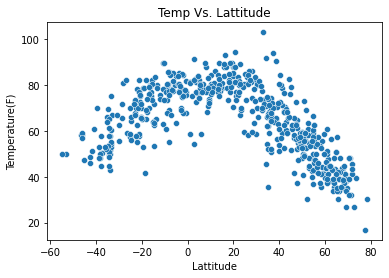

In [11]:
ax = sns.scatterplot(x='lat',y='temp',data=df,)
print(type(ax))
ax.set(xlabel='Lattitude',ylabel='Temperature(F)',title = 'Temp Vs. Lattitude')
plt.show()

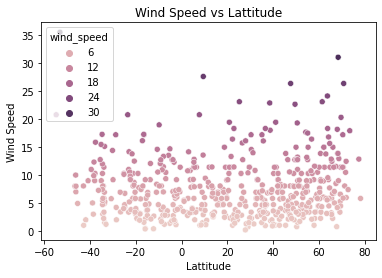

In [12]:
ax = sns.scatterplot(x='lat',y='wind_speed',data=df,hue='wind_speed')
ax.set_ylabel('Wind Speed')
ax.set_xlabel('Lattitude')
ax.set_title('Wind Speed vs Lattitude')
plt.show()

### As a Data-Scientist:
In addition to generating data, munging data and plotting data you will also be responsible for *interpreting* data. 
* Provide a written description of three observable trends based on the data.

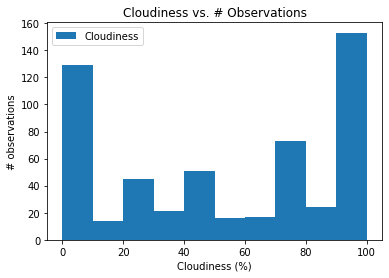

In [13]:
# Histogram 
fig, ax = plt.subplots()

ax.hist(df['cloudiness'],label = 'Cloudiness')

ax.set_xlabel('Cloudiness (%)')
ax.set_ylabel('# observations')

ax.set_title("Cloudiness vs. # Observations")
ax.legend()
plt.show()

# this does not seem to follow a normal distribution

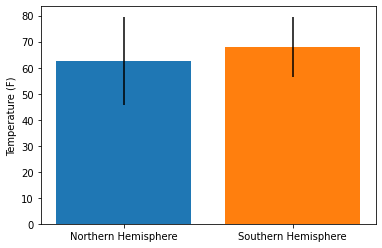

In [14]:
# Error bars
fig, ax = plt.subplots()

ax.bar("Northern Hemisphere", df[df['lat']>0]["temp"].mean(), yerr=df[df['lat']>0]["temp"].std())
ax.bar("Southern Hemisphere", df[df['lat']<0]["temp"].mean(), yerr=df[df['lat']<0]["temp"].std())

ax.set_ylabel("Temperature (F)")
plt.show()

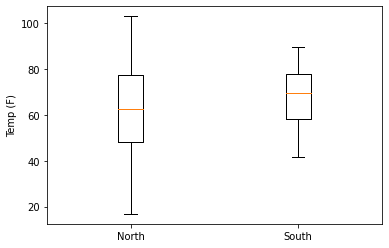

In [15]:
fig, ax = plt.subplots()
ax.boxplot([df[df['lat']>0]["temp"],df[df['lat']<0]["temp"]])
ax.set_xticklabels(["North","South"])
ax.set_ylabel("Temp (F)")
plt.show()

Text(0.5, 0, 'lat')

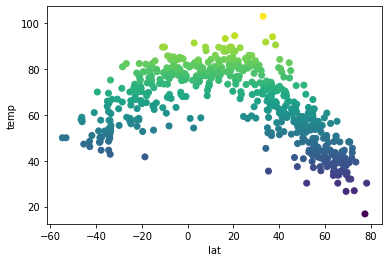

In [16]:
fig, ax = plt.subplots()

ax.scatter(df['lat'],df['temp'], c=df['temp'])
ax.set_ylabel('temp')
ax.set_xlabel('lat')

### OPTIONAL Homework Problem: 
* Use a **different** api endpoint such as `Hourly Forecast 4 days` to get data. 
* Other weather api endpoints are documented [here](https://openweathermap.org/api). 
* You will have to change the URL parameters to get the data you want. 
* Get the data into a data structure of your choice. (Pandas, dicts, lists etc...)
* Use the plotting library of your choice to make 1-4 plots of your choice. 

In [17]:
base_url = f'https://api.openweathermap.org/data/2.5/onecall?lat=33.441792&lon=-94.037689&exclude=hourly,daily&appid={api_key}'

In [18]:
req = requests.get(base_url)

In [19]:
req.json()

{'lat': 33.44,
 'lon': -94.04,
 'timezone': 'America/Chicago',
 'timezone_offset': -18000,
 'current': {'dt': 1600902218,
  'sunrise': 1600862717,
  'sunset': 1600906283,
  'temp': 291.26,
  'feels_like': 290.88,
  'pressure': 1013,
  'humidity': 100,
  'dew_point': 291.26,
  'uvi': 7.63,
  'clouds': 90,
  'visibility': 10000,
  'wind_speed': 4.6,
  'wind_deg': 40,
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04d'}]},
 'minutely': [{'dt': 1600902240, 'precipitation': 0},
  {'dt': 1600902300, 'precipitation': 0},
  {'dt': 1600902360, 'precipitation': 0},
  {'dt': 1600902420, 'precipitation': 0},
  {'dt': 1600902480, 'precipitation': 0},
  {'dt': 1600902540, 'precipitation': 0},
  {'dt': 1600902600, 'precipitation': 0},
  {'dt': 1600902660, 'precipitation': 0},
  {'dt': 1600902720, 'precipitation': 0},
  {'dt': 1600902780, 'precipitation': 0},
  {'dt': 1600902840, 'precipitation': 0},
  {'dt': 1600902900, 'precipitation': 0},
  {'dt':

In [24]:
help(pd.DataFrame.append)

Help on function append in module pandas.core.frame:

append(self, other, ignore_index=False, verify_integrity=False, sort=False) -> 'DataFrame'
    Append rows of `other` to the end of caller, returning a new object.
    
    Columns in `other` that are not in the caller are added as new columns.
    
    Parameters
    ----------
    other : DataFrame or Series/dict-like object, or list of these
        The data to append.
    ignore_index : bool, default False
        If True, do not use the index labels.
    verify_integrity : bool, default False
        If True, raise ValueError on creating index with duplicates.
    sort : bool, default False
        Sort columns if the columns of `self` and `other` are not aligned.
    
        .. versionadded:: 0.23.0
        .. versionchanged:: 1.0.0
    
            Changed to not sort by default.
    
    Returns
    -------
    DataFrame
    
    See Also
    --------
    concat : General function to concatenate DataFrame or Series objects.